In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data = pd.read_csv('/content/Simplified All New Signals_weather holiday.csv')
data = pd.read_csv('/content/drive/MyDrive/updated_Simplified All New Signals_weather holiday.csv')
data['date'] = pd.to_datetime(data['date'])
start_date = '2020-04-20'
end_date = '2023-03-16'
data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
data.tail()

,date,ridership,weather,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,...,metlife-stadium_event_occurred,total_music,palladium-times-square_event_occurred,radio-city-music-hall_event_occurred,sony-hall_event_occurred,terminal-5_event_occurred,the-bowery-ballroom_event_occurred,the-town-hall_event_occurred,yankee-stadium_event_occurred,nyc_holiday
1166,2023-03-12,1773585.0,Cloudy,43.0,36.0,1,0,1,1,0,...,0,55,0,0,0,0,1,1,0,0
1167,2023-03-13,3352388.0,Cloudy,41.0,37.0,0,0,1,0,0,...,0,31,0,0,0,1,0,0,0,0
1168,2023-03-14,3577250.0,Cloudy,43.0,41.0,1,0,1,0,0,...,0,41,0,0,1,0,1,1,0,0
1169,2023-03-15,3912366.0,Cloudy,39.0,34.0,0,0,1,0,1,...,0,31,0,1,0,1,0,1,0,0
1170,2023-03-16,3949788.0,Cloudy,39.0,36.0,1,1,1,1,0,...,0,39,0,1,1,1,1,1,0,0


In [ ]:
data = pd.get_dummies(data, prefix=['weather'], columns=['weather'])
data

,date,ridership,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,...,the-bowery-ballroom_event_occurred,the-town-hall_event_occurred,yankee-stadium_event_occurred,nyc_holiday,weather_Clear sky,weather_Cloudy,weather_Rain and snow,weather_Rainy,weather_Snowy,weather_Thunderstorm
110,2020-04-20,437852.0,55.0,54.0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
111,2020-04-21,422107.0,55.0,48.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
112,2020-04-22,458781.0,48.0,39.0,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
113,2020-04-23,453520.0,48.0,41.0,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
114,2020-04-24,443956.0,46.0,45.0,0,0,1,1,0,1,...,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,2023-03-12,1773585.0,43.0,36.0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
1167,2023-03-13,3352388.0,41.0,37.0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1168,2023-03-14,3577250.0,43.0,41.0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1169,2023-03-15,3912366.0,39.0,34.0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
#rename for prophet requirement
data = data.rename(columns={"date": "ds", "ridership": "y"})

In [ ]:
#check null values
print(data.isna().sum())

ds                                       0
y                                        0
day temp                                 2
night temp                               2
barclays-center_event_occurred           0
beacon-theatre_event_occurred            0
blue-note-jazz-club_event_occurred       0
brooklyn-bowl_event_occurred             0
carnegie-hall_event_occurred             0
city-winery-the-loft_event_occurred      0
total_comedy                             0
total_events                             0
total_film-screenings                    0
forest-hills-stadium_event_occurred      0
irving-plaza_event_occurred              0
kings-theatre_event_occurred             0
lincoln-center_event_occurred            0
madison-square-garden_event_occurred     0
mercury-lounge_event_occurred            0
metlife-stadium_event_occurred           0
total_music                              0
palladium-times-square_event_occurred    0
radio-city-music-hall_event_occurred     0
sony-hall_e

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 110 to 1170
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ds                                     1059 non-null   datetime64[ns]
 1   y                                      1059 non-null   float64       
 2   day temp                               1059 non-null   float64       
 3   night temp                             1059 non-null   float64       
 4   barclays-center_event_occurred         1059 non-null   int64         
 5   beacon-theatre_event_occurred          1059 non-null   int64         
 6   blue-note-jazz-club_event_occurred     1059 non-null   int64         
 7   brooklyn-bowl_event_occurred           1059 non-null   int64         
 8   carnegie-hall_event_occurred           1059 non-null   int64         
 9   city-winery-the-loft_event_occurred    1059 non-null   int64 

In [ ]:
'''
fold1 = data[(data['ds'] >= start_date) & (data['ds'] <= "2020-09-25")]
fold2 = data[(data['ds'] >= start_date) & (data['ds'] <= "2021-03-24")]
fold3 = data[(data['ds'] >= start_date) & (data['ds'] <= "2021-09-20")]
fold4 = data[(data['ds'] >= start_date) & (data['ds'] <= "2022-03-19")]
fold5 = data[(data['ds'] >= start_date) & (data['ds'] <= "2022-09-15")]
fold6 = data[(data['ds'] >= start_date) & (data['ds'] <= "2023-03-02")]
'''

'\nfold1 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2020-09-25")]\nfold2 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2021-03-24")]\nfold3 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2021-09-20")]\nfold4 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2022-03-19")]\nfold5 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2022-09-15")]\nfold6 = data[(data[\'ds\'] >= start_date) & (data[\'ds\'] <= "2023-03-02")]\n'

In [ ]:
data.tail()

,ds,y,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,city-winery-the-loft_event_occurred,...,the-bowery-ballroom_event_occurred,the-town-hall_event_occurred,yankee-stadium_event_occurred,nyc_holiday,weather_Clear sky,weather_Cloudy,weather_Rain and snow,weather_Rainy,weather_Snowy,weather_Thunderstorm
1166,2023-03-12,1773585.0,43.0,36.0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
1167,2023-03-13,3352388.0,41.0,37.0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1168,2023-03-14,3577250.0,43.0,41.0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1169,2023-03-15,3912366.0,39.0,34.0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
1170,2023-03-16,3949788.0,39.0,36.0,1,1,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
fold1 = data[(data['ds'] >= start_date) & (data['ds'] <= "2020-09-11")]
fold2 = data[(data['ds'] >= start_date) & (data['ds'] <= "2021-03-10")]
fold3 = data[(data['ds'] >= start_date) & (data['ds'] <= "2021-09-06")]
fold4 = data[(data['ds'] >= start_date) & (data['ds'] <= "2022-03-05")]
fold5 = data[(data['ds'] >= start_date) & (data['ds'] <= "2022-09-01")]
fold6 = data[(data['ds'] >= start_date) & (data['ds'] <= "2023-02-16")]
fold7 = data[(data['ds'] >= "2022-02-01") & (data['ds'] <= "2023-03-02")]
testing = data[(data['ds'] >= "2023-03-03") & (data['ds'] <= "2023-03-16")]

In [ ]:
fold7.columns

Index(['ds', 'y', 'day temp', 'night temp', 'barclays-center_event_occurred',
       'beacon-theatre_event_occurred', 'blue-note-jazz-club_event_occurred',
       'brooklyn-bowl_event_occurred', 'carnegie-hall_event_occurred',
       'city-winery-the-loft_event_occurred', 'total_comedy', 'total_events',
       'total_film-screenings', 'forest-hills-stadium_event_occurred',
       'irving-plaza_event_occurred', 'kings-theatre_event_occurred',
       'lincoln-center_event_occurred', 'madison-square-garden_event_occurred',
       'mercury-lounge_event_occurred', 'metlife-stadium_event_occurred',
       'total_music', 'palladium-times-square_event_occurred',
       'radio-city-music-hall_event_occurred', 'sony-hall_event_occurred',
       'terminal-5_event_occurred', 'the-bowery-ballroom_event_occurred',
       'the-town-hall_event_occurred', 'yankee-stadium_event_occurred',
       'nyc_holiday', 'weather_Clear sky', 'weather_Cloudy',
       'weather_Rain and snow', 'weather_Rainy', 'weath

# Event related high relevant sigals

In [ ]:
event = fold7[['ds','y','total_comedy','total_events','total_film-screenings','total_music']]

In [ ]:
m1 = Prophet()
for column in event.columns:
  if column !='ds' and column != 'y':
    m1.add_regressor(column)

m1.fit(event)
forecast1 = m1.predict(testing)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/n1lptprj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/8axfra91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45428', 'data', 'file=/tmp/tmpizbj2jz4/n1lptprj.json', 'init=/tmp/tmpizbj2jz4/8axfra91.json', 'output', 'file=/tmp/tmpizbj2jz4/prophet_modelbe29d86b/prophet_model-20230425135137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


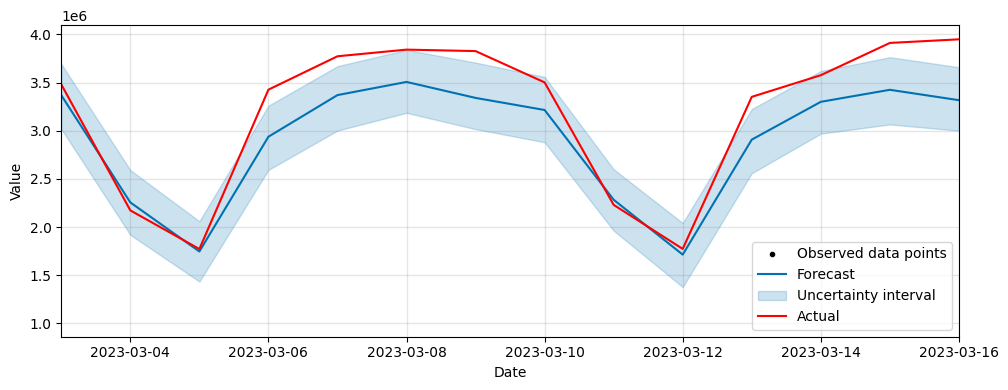

In [ ]:
# plot only the forecast
fig = m1.plot(forecast1, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([testing['ds'].min(), testing['ds'].max()])
dates = testing['ds']
plt.plot(dates,testing['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
test_data = testing
y_true = test_data['y'].values
y_pred1 = forecast1['yhat'].values
absolute_percentage_error = np.abs((y_true - y_pred1) / y_true)
mean_absolute_percentage_error = np.mean(absolute_percentage_error) * 100
mean_absolute_percentage_error

8.444440299874532

# Event and temp

In [ ]:
eventemp = fold7[['ds','y','day temp','night temp','total_comedy','total_events','total_film-screenings','total_music']]

In [ ]:
m2 = Prophet()
for column in eventemp.columns:
  if column !='ds' and column != 'y':
    m2.add_regressor(column)

m2.fit(eventemp)
forecast2 = m2.predict(testing)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/kjrk8wma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/gt2j_lyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78780', 'data', 'file=/tmp/tmpizbj2jz4/kjrk8wma.json', 'init=/tmp/tmpizbj2jz4/gt2j_lyd.json', 'output', 'file=/tmp/tmpizbj2jz4/prophet_modelbcxfvniu/prophet_model-20230425135601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


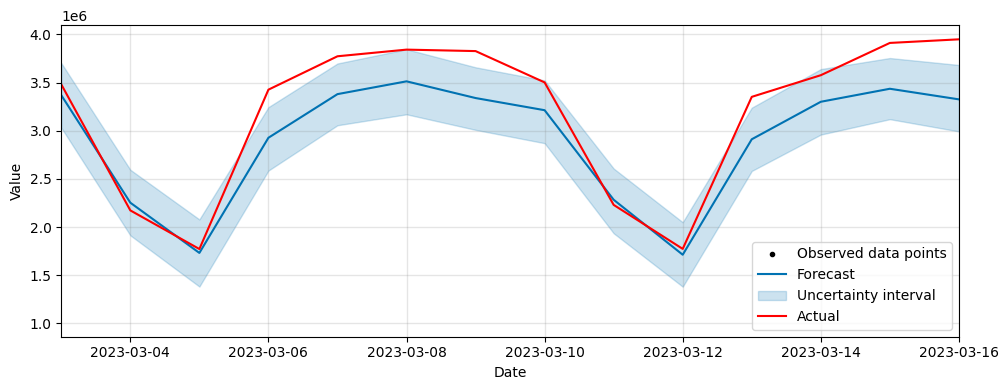

In [ ]:
# plot only the forecast
fig = m2.plot(forecast2, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([testing['ds'].min(), testing['ds'].max()])
dates = testing['ds']
plt.plot(dates,testing['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
test_data = testing
y_true = test_data['y'].values
y_pred1 = forecast2['yhat'].values
absolute_percentage_error = np.abs((y_true - y_pred1) / y_true)
mean_absolute_percentage_error = np.mean(absolute_percentage_error) * 100
mean_absolute_percentage_error

8.453086245024439

# using all signals

In [ ]:
# Separate the data into training and testing sets
train_data = fold7
test_data = testing

# Initialize the Prophet model
m = Prophet()

# Add the regressors to the model for both training and testing sets
for column in fold7.columns:
    if column != 'ds' and column != 'y':
        m.add_regressor(column)

# Fit the model to the training set
m.fit(train_data)

# Make predictions for the testing set
#future = m.make_future_dataframe(periods=len(test_data))
forecast = m.predict(testing)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/053oc6wn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/8ge8ba18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13153', 'data', 'file=/tmp/tmp0urqv_o8/053oc6wn.json', 'init=/tmp/tmp0urqv_o8/8ge8ba18.json', 'output', 'file=/tmp/tmp0urqv_o8/prophet_models2migqkk/prophet_model-20230425171337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


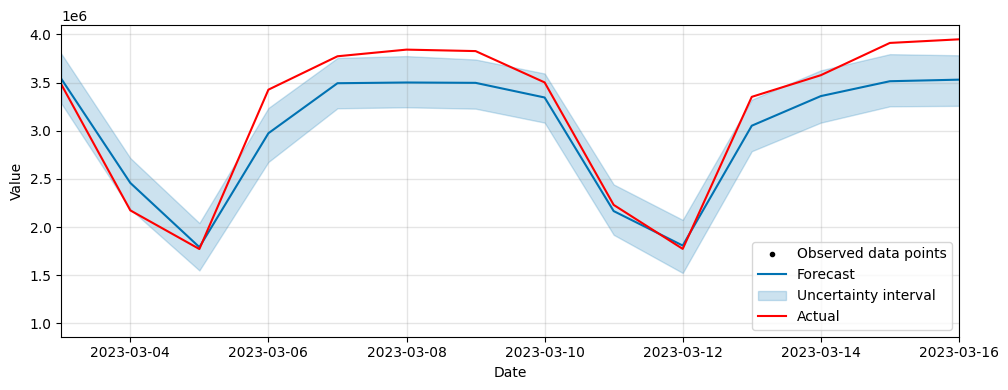

In [ ]:
# plot only the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([testing['ds'].min(), testing['ds'].max()])
dates = testing['ds']
plt.plot(dates,testing['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
y_true = test_data['y'].values
y_pred = forecast['yhat'].values
absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
mean_absolute_percentage_error = np.mean(absolute_percentage_error) * 100
mean_absolute_percentage_error

7.077128915667657

#grid search for fold 7

In [ ]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 10],
    'seasonality_mode':['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(fold7)  # Fit model with given params
    forecast = m.predict(testing)
    score = np.mean(np.abs((testing['y'].values - forecast['yhat'].values)/testing['y'].values))*100
    mapes.append(score)

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/eqj2w8j8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/t6xhf9tr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55333', 'data', 'file=/tmp/tmp0urqv_o8/eqj2w8j8.json', 'init=/tmp/tmp0urqv_o8/t6xhf9tr.json', 'output', 'file=/tmp/tmp0urqv_o8/prophet_modelccyoqk10/prophet_model-20230425170624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:06:24 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.01   
2                     0.001                     0.01                 10.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.01   
62                    0.500                    10.00                 10.00   
63                    0.500                    10.00                 10.00   

   seasonality_mode       mape  
0          additive  12.305726

In [ ]:
tuning_results.sort_values('mape', ascending=True)

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,mape
31,0.010,10.00,10.00,multiplicative,4.240327
29,0.010,10.00,0.01,multiplicative,4.240327
27,0.010,1.00,10.00,multiplicative,4.249303
25,0.010,1.00,0.01,multiplicative,4.249303
9,0.001,1.00,0.01,multiplicative,4.374963
...,...,...,...,...,...
51,0.500,0.01,10.00,multiplicative,17.766339
3,0.001,0.01,10.00,multiplicative,17.961046
1,0.001,0.01,0.01,multiplicative,17.961046
35,0.100,0.01,10.00,multiplicative,18.060400


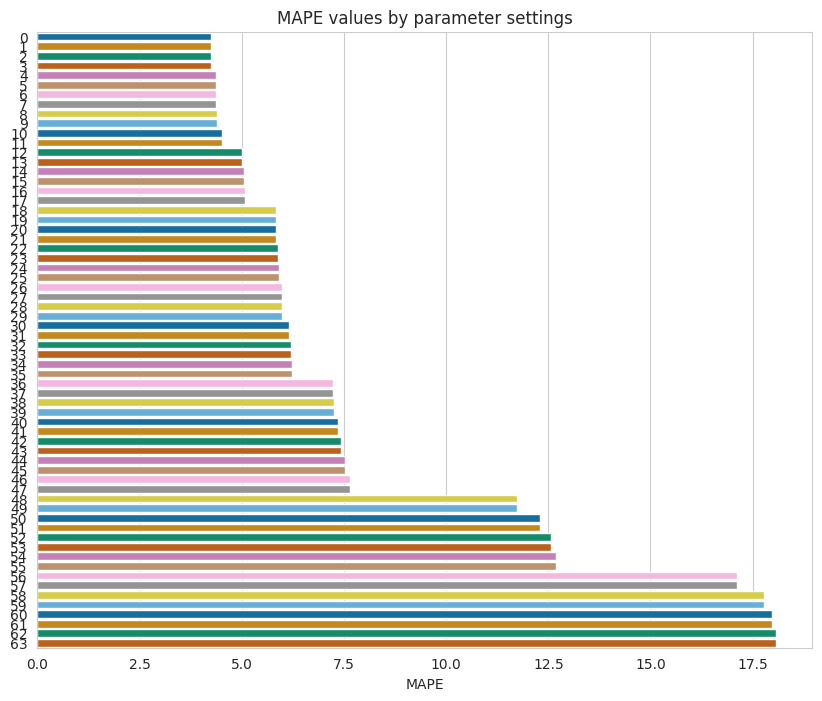

In [ ]:
# Sort the dataframe by 'mape'
tuning_results_sorted = tuning_results.sort_values(by='mape',ascending =True).reset_index()

# Create a horizontal bar chart
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='mape', y=tuning_results_sorted.index, data=tuning_results_sorted, ax=ax, palette='colorblind',orient='h')

# Add labels and a title
ax.set_xlabel('MAPE')
ax.set_ylabel('')
ax.set_title('MAPE values by parameter settings')

# Show the plot
plt.show()

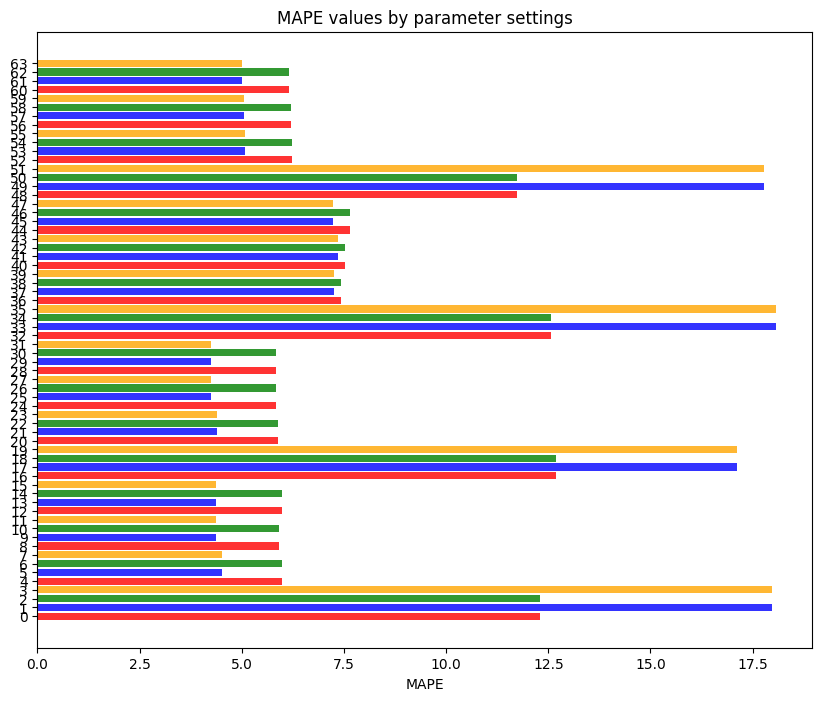

In [ ]:
# Create a list of colors for the bars
colors = ['red', 'blue', 'green', 'orange']

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
y_pos = np.arange(len(tuning_results.index))
ax.barh(y_pos, tuning_results['mape'], color=colors, alpha=0.8)

# Add labels and a title
ax.set_yticks(y_pos)
ax.set_yticklabels(tuning_results.index)
ax.set_xlabel('MAPE')
ax.set_title('MAPE values by parameter settings')

# Show the plot
plt.show()

#grid search for events


In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 10],
    'seasonality_mode':['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes1 = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m1 = Prophet(**params).fit(event)  # Fit model with given params
    forecast1 = m1.predict(testing)
    score1 = np.mean(np.abs((testing['y'].values - forecast1['yhat'].values)/testing['y'].values))*100
    mapes1.append(score1)

# Find the best parameters
tuning_results1 = pd.DataFrame(all_params)
tuning_results1['mape1'] = mapes1
print(tuning_results1)




param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 10],
    'seasonality_mode':['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(fold7)  # Fit model with given params
    forecast = m.predict(testing)
    score = np.mean(np.abs((testing['y'].values - forecast['yhat'].values)/testing['y'].values))*100
    mapes.append(score)

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/5g7qxe04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/x_xzj6ff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87273', 'data', 'file=/tmp/tmp0urqv_o8/5g7qxe04.json', 'init=/tmp/tmp0urqv_o8/x_xzj6ff.json', 'output', 'file=/tmp/tmp0urqv_o8/prophet_modelflo8pwlr/prophet_model-20230425174301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:43:01 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.01   
2                     0.001                     0.01                 10.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.01   
62                    0.500                    10.00                 10.00   
63                    0.500                    10.00                 10.00   

   seasonality_mode      mape1  
0          additive  12.305726

In [ ]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2023-03-03,3.008746e+06,3.012157e+06,3.716204e+06,3.008746e+06,3.008746e+06,0.114427,0.114427,0.114427,0.114427,0.114427,0.114427,0.0,0.0,0.0,3.353027e+06
1,2023-03-04,3.010166e+06,1.885250e+06,2.564590e+06,3.010166e+06,3.010166e+06,-0.256774,-0.256774,-0.256774,-0.256774,-0.256774,-0.256774,0.0,0.0,0.0,2.237234e+06
2,2023-03-05,3.011586e+06,1.423981e+06,2.088460e+06,3.011586e+06,3.011586e+06,-0.416001,-0.416001,-0.416001,-0.416001,-0.416001,-0.416001,0.0,0.0,0.0,1.758762e+06
3,2023-03-06,3.013006e+06,2.694720e+06,3.423411e+06,3.012769e+06,3.013658e+06,0.014318,0.014318,0.014318,0.014318,0.014318,0.014318,0.0,0.0,0.0,3.056147e+06
4,2023-03-07,3.014426e+06,3.184131e+06,3.853996e+06,3.013488e+06,3.015820e+06,0.166671,0.166671,0.166671,0.166671,0.166671,0.166671,0.0,0.0,0.0,3.516845e+06
5,2023-03-08,3.015846e+06,3.245234e+06,3.952736e+06,3.014343e+06,3.018340e+06,0.194642,0.194642,0.194642,0.194642,0.194642,0.194642,0.0,0.0,0.0,3.602857e+06
6,2023-03-09,3.017266e+06,3.228121e+06,3.923787e+06,3.014444e+06,3.021447e+06,0.182717,0.182717,0.182717,0.182717,0.182717,0.182717,0.0,0.0,0.0,3.568572e+06
7,2023-03-10,3.018686e+06,3.042329e+06,3.708757e+06,3.014146e+06,3.024108e+06,0.114427,0.114427,0.114427,0.114427,0.114427,0.114427,0.0,0.0,0.0,3.364104e+06
8,2023-03-11,3.020106e+06,1.891719e+06,2.602442e+06,3.014003e+06,3.027439e+06,-0.256774,-0.256774,-0.256774,-0.256774,-0.256774,-0.256774,0.0,0.0,0.0,2.244622e+06
9,2023-03-12,3.021526e+06,1.431532e+06,2.107801e+06,3.012899e+06,3.030476e+06,-0.416001,-0.416001,-0.416001,-0.416001,-0.416001,-0.416001,0.0,0.0,0.0,1.764567e+06


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,barclays-center_event_occurred,...,weekly,weekly_lower,weekly_upper,yankee-stadium_event_occurred,yankee-stadium_event_occurred_lower,yankee-stadium_event_occurred_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-03,2.922212e+06,3.284931e+06,3.801257e+06,2.922212e+06,2.922212e+06,6.175868e+05,6.175868e+05,6.175868e+05,0.000000,...,1.415249e+05,1.415249e+05,1.415249e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.539799e+06
1,2023-03-04,2.923549e+06,2.186232e+06,2.716546e+06,2.923549e+06,2.923549e+06,-4.650265e+05,-4.650265e+05,-4.650265e+05,14124.342622,...,-1.022758e+06,-1.022758e+06,-1.022758e+06,0.0,0.0,0.0,0.0,0.0,0.0,2.458522e+06
2,2023-03-05,2.924886e+06,1.549616e+06,2.041863e+06,2.924886e+06,2.924886e+06,-1.133322e+06,-1.133322e+06,-1.133322e+06,14124.342622,...,-1.134310e+06,-1.134310e+06,-1.134310e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.791564e+06
3,2023-03-06,2.926223e+06,2.676171e+06,3.236913e+06,2.926207e+06,2.926250e+06,4.845550e+04,4.845550e+04,4.845550e+04,0.000000,...,3.584917e+05,3.584917e+05,3.584917e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.974678e+06
4,2023-03-07,2.927560e+06,3.233451e+06,3.756169e+06,2.927440e+06,2.927692e+06,5.664023e+05,5.664023e+05,5.664023e+05,14124.342622,...,6.057969e+05,6.057969e+05,6.057969e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.493962e+06
5,2023-03-08,2.928897e+06,3.243977e+06,3.775640e+06,2.928668e+06,2.929174e+06,5.725891e+05,5.725891e+05,5.725891e+05,14124.342622,...,5.816071e+05,5.816071e+05,5.816071e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.501486e+06
6,2023-03-09,2.930234e+06,3.229628e+06,3.740086e+06,2.929872e+06,2.930688e+06,5.676456e+05,5.676456e+05,5.676456e+05,14124.342622,...,4.696474e+05,4.696474e+05,4.696474e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.497880e+06
7,2023-03-10,2.931571e+06,3.084753e+06,3.594795e+06,2.931031e+06,2.932166e+06,4.141440e+05,4.141440e+05,4.141440e+05,0.000000,...,1.415249e+05,1.415249e+05,1.415249e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.345715e+06
8,2023-03-11,2.932908e+06,1.919765e+06,2.442791e+06,2.932194e+06,2.933685e+06,-7.667292e+05,-7.667292e+05,-7.667292e+05,14124.342622,...,-1.022758e+06,-1.022758e+06,-1.022758e+06,0.0,0.0,0.0,0.0,0.0,0.0,2.166179e+06
9,2023-03-12,2.934245e+06,1.523447e+06,2.074733e+06,2.933323e+06,2.935216e+06,-1.126160e+06,-1.126160e+06,-1.126160e+06,14124.342622,...,-1.134310e+06,-1.134310e+06,-1.134310e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.808084e+06


In [ ]:
score1

4.999456489333574

In [ ]:
tuning_results1.sort_values('mape1',ascending = True)

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,mape1
31,0.010,10.00,10.00,multiplicative,4.240327
29,0.010,10.00,0.01,multiplicative,4.240327
27,0.010,1.00,10.00,multiplicative,4.249303
25,0.010,1.00,0.01,multiplicative,4.249303
9,0.001,1.00,0.01,multiplicative,4.374963
...,...,...,...,...,...
51,0.500,0.01,10.00,multiplicative,17.766339
3,0.001,0.01,10.00,multiplicative,17.961046
1,0.001,0.01,0.01,multiplicative,17.961046
35,0.100,0.01,10.00,multiplicative,18.060400


In [ ]:
mapes1

In [ ]:
mapes

#grid search for events and temp

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 10],
    'seasonality_mode':['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes2 = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m2 = Prophet(**params).fit(eventemp)  # Fit model with given params
    forecast2 = m2.predict(testing)
    score2 = np.mean(np.abs((testing['y'].values - forecast2['yhat'].values)/testing['y'].values))*100
    mapes2.append(score2)

# Find the best parameters
tuning_results2 = pd.DataFrame(all_params)
tuning_results2['mape2'] = mapes2
print(tuning_results2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/6tvzber8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0urqv_o8/0fcaril3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89108', 'data', 'file=/tmp/tmp0urqv_o8/6tvzber8.json', 'init=/tmp/tmp0urqv_o8/0fcaril3.json', 'output', 'file=/tmp/tmp0urqv_o8/prophet_modelazp5emhd/prophet_model-20230425175311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:53:11 - cmdstanpy - ERROR - Chain [1] 

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.01   
2                     0.001                     0.01                 10.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.01   
62                    0.500                    10.00                 10.00   
63                    0.500                    10.00                 10.00   

   seasonality_mode      mape2  
0          additive  12.305726

In [ ]:
tuning_results2.sort_values('mape2',ascending = True)

,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,mape2
31,0.010,10.00,10.00,multiplicative,4.240327
29,0.010,10.00,0.01,multiplicative,4.240327
27,0.010,1.00,10.00,multiplicative,4.249303
25,0.010,1.00,0.01,multiplicative,4.249303
9,0.001,1.00,0.01,multiplicative,4.374963
...,...,...,...,...,...
51,0.500,0.01,10.00,multiplicative,17.766339
3,0.001,0.01,10.00,multiplicative,17.961046
1,0.001,0.01,0.01,multiplicative,17.961046
35,0.100,0.01,10.00,multiplicative,18.060400


In [ ]:
forecast = m.predict(testing)

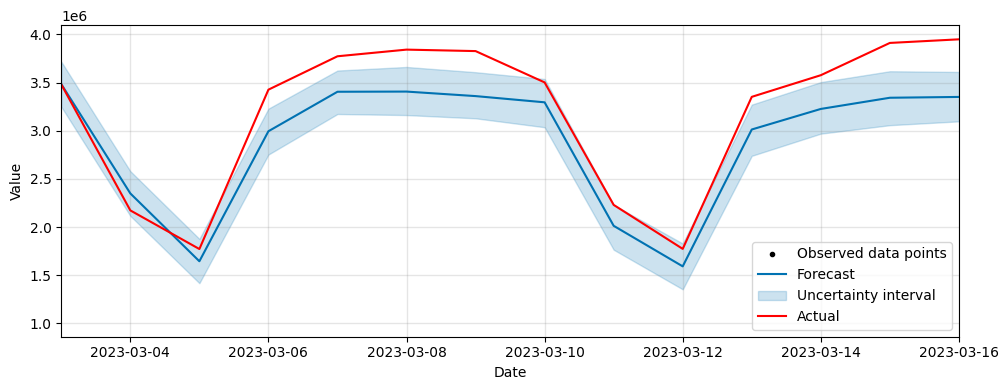

In [ ]:
# plot only the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([testing['ds'].min(), testing['ds'].max()])
dates = testing['ds']
plt.plot(dates,testing['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
y_true = test_data['y'].values
y_pred = forecast['yhat'].values
absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
mean_absolute_percentage_error = np.mean(absolute_percentage_error) * 100
mean_absolute_percentage_error

9.768527285618545

# event 

# Fold 1

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold1

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params
    print (best_params)

# Fit final model with best hyperparameters
m = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m.fit(df)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/rheyk3f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/2762gaay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23886', 'data', 'file=/tmp/tmpizbj2jz4/rheyk3f6.json', 'init=/tmp/tmpizbj2jz4/2762gaay.json', 'output', 'file=/tmp/tmpizbj2jz4/prophet_model4ur6tfiv/prophet_model-20230425141144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

{'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/7792lq2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/4ngxiqqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29966', 'data', 'file=/tmp/tmpizbj2jz4/7792lq2v.json', 'init=/tmp/tmpizbj2jz4/4ngxiqqy.json', 'output', 'file=/tmp/tmpizbj2jz4/prophet_modelg9w44bhz/prophet_model-20230425141144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi

{'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/3rkvurj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizbj2jz4/21juoihi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47717', 'data', 'file=/tmp/tmpizbj2jz4/3rkvurj1.json', 'init=/tmp/tmpizbj2jz4/21juoihi.json', 'output', 'file=/tmp/tmpizbj2jz4/prophet_model4nu4oo2m/prophet_model-20230425141145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi

{'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


In [ ]:
validation_start = '2023-03-03'
validation_end = '2023-03-16'
validation_data = data[(data['ds'] >= validation_start) & (data['ds'] <= validation_end)]
validation_data = validation_data.reset_index()

In [ ]:
validation_data

,index,ds,y,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,...,the-bowery-ballroom_event_occurred,the-town-hall_event_occurred,yankee-stadium_event_occurred,nyc_holiday,weather_Clear sky,weather_Cloudy,weather_Rain and snow,weather_Rainy,weather_Snowy,weather_Thunderstorm
0,1157,2023-03-03,3481830.0,45.0,41.0,0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1158,2023-03-04,2173217.0,43.0,41.0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1159,2023-03-05,1772121.0,52.0,39.0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1160,2023-03-06,3427019.0,50.0,43.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1161,2023-03-07,3773780.0,39.0,41.0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5,1162,2023-03-08,3842861.0,41.0,32.0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
6,1163,2023-03-09,3827656.0,45.0,36.0,1,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
7,1164,2023-03-10,3502339.0,43.0,36.0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,0,0
8,1165,2023-03-11,2230530.0,41.0,36.0,1,1,1,1,0,...,1,1,0,0,0,0,0,1,0,0
9,1166,2023-03-12,1773585.0,43.0,36.0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
forecast = m.predict(validation_data)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2023-03-03,7.101487e+06,8.103324e+06,8.274421e+06,7.101487e+06,7.101487e+06,0.152722,0.152722,0.152722,0.152722,0.152722,0.152722,0.0,0.0,0.0,8.186044e+06
1,2023-03-04,7.107887e+06,4.993820e+06,5.172796e+06,7.107428e+06,7.108377e+06,-0.284760,-0.284760,-0.284760,-0.284760,-0.284760,-0.284760,0.0,0.0,0.0,5.083847e+06
2,2023-03-05,7.114287e+06,3.949744e+06,4.127192e+06,7.112970e+06,7.115694e+06,-0.432754,-0.432754,-0.432754,-0.432754,-0.432754,-0.432754,0.0,0.0,0.0,4.035551e+06
3,2023-03-06,7.120687e+06,7.555210e+06,7.737339e+06,7.118395e+06,7.123106e+06,0.073484,0.073484,0.073484,0.073484,0.073484,0.073484,0.0,0.0,0.0,7.643946e+06
4,2023-03-07,7.127087e+06,8.101065e+06,8.276076e+06,7.123351e+06,7.130756e+06,0.149044,0.149044,0.149044,0.149044,0.149044,0.149044,0.0,0.0,0.0,8.189336e+06
5,2023-03-08,7.133487e+06,8.277008e+06,8.451062e+06,7.128267e+06,7.138795e+06,0.172643,0.172643,0.172643,0.172643,0.172643,0.172643,0.0,0.0,0.0,8.365036e+06
6,2023-03-09,7.139887e+06,8.267073e+06,8.443217e+06,7.133079e+06,7.146872e+06,0.169620,0.169620,0.169620,0.169620,0.169620,0.169620,0.0,0.0,0.0,8.350954e+06
7,2023-03-10,7.146287e+06,8.148957e+06,8.323041e+06,7.137339e+06,7.155511e+06,0.152722,0.152722,0.152722,0.152722,0.152722,0.152722,0.0,0.0,0.0,8.237686e+06
8,2023-03-11,7.152687e+06,5.033525e+06,5.205921e+06,7.142053e+06,7.163691e+06,-0.284760,-0.284760,-0.284760,-0.284760,-0.284760,-0.284760,0.0,0.0,0.0,5.115890e+06
9,2023-03-12,7.159087e+06,3.975606e+06,4.156308e+06,7.146650e+06,7.172056e+06,-0.432754,-0.432754,-0.432754,-0.432754,-0.432754,-0.432754,0.0,0.0,0.0,4.060964e+06


In [ ]:
forecast['actual'] = validation_data['y']

In [ ]:
validation_data['y']

0     3481830.0
1     2173217.0
2     1772121.0
3     3427019.0
4     3773780.0
5     3842861.0
6     3827656.0
7     3502339.0
8     2230530.0
9     1773585.0
10    3352388.0
11    3577250.0
12    3912366.0
13    3949788.0
Name: y, dtype: float64

In [ ]:
forecast['actual']

0     3481830.0
1     2173217.0
2     1772121.0
3     3427019.0
4     3773780.0
5     3842861.0
6     3827656.0
7     3502339.0
8     2230530.0
9     1773585.0
10    3352388.0
11    3577250.0
12    3912366.0
13    3949788.0
Name: actual, dtype: float64

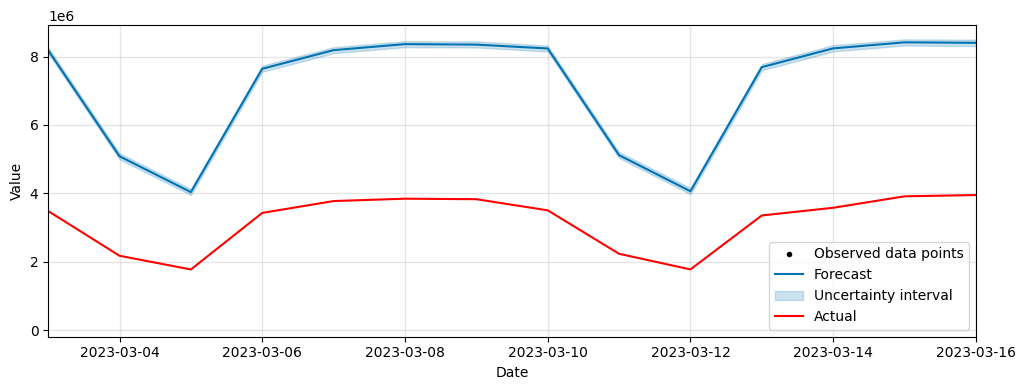

In [ ]:
# plot only the forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_errorm

#fold 1
ape = np.abs((forecast['actual'] - forecast['trend']) / forecast['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

ImportError: ignored

#fold 2

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold2

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m2 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m2.fit(df)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/hxd4u30w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/wifoof61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88109', 'data', 'file=/tmp/tmpu7xzseww/hxd4u30w.json', 'init=/tmp/tmpu7xzseww/wifoof61.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_modelw7pmkw82/prophet_model-20230419173309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [ ]:
forecast2 = m2.predict(validation_data)
forecast2['actual'] = validation_data['y']

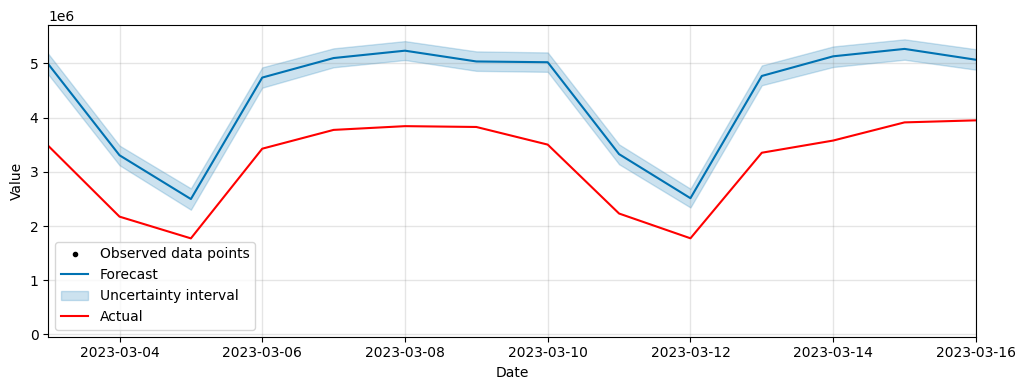

In [ ]:
# plot only the forecast
fig = m2.plot(forecast2, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 2
ape = np.abs((forecast2['actual'] - forecast2['trend']) / forecast2['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 28.078%


#fold 3

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold3

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m3 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m3.fit(df)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/6zpjhpon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/pv9fcq_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51469', 'data', 'file=/tmp/tmpu7xzseww/6zpjhpon.json', 'init=/tmp/tmpu7xzseww/pv9fcq_y.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_model5m5c6f5y/prophet_model-20230419173312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [ ]:
forecast3 = m3.predict(validation_data)
forecast3['actual'] = validation_data['y']

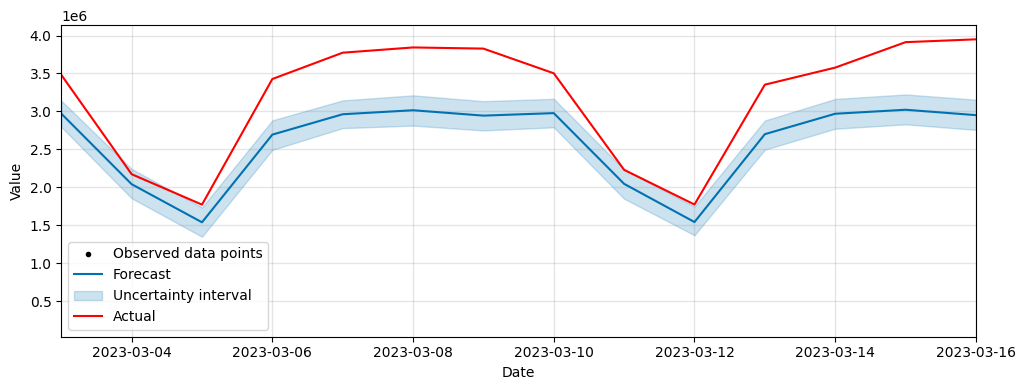

In [ ]:
# plot only the forecast
fig = m3.plot(forecast3, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 3
ape = np.abs((forecast3['actual'] - forecast3['trend']) / forecast3['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 36.000%


#fold 4

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold4

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m4 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m4.fit(df)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/o9mpy_w2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/axmcz92s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19983', 'data', 'file=/tmp/tmpu7xzseww/o9mpy_w2.json', 'init=/tmp/tmpu7xzseww/axmcz92s.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_model_wcahs_k/prophet_model-20230419173315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [ ]:
forecast4 = m4.predict(validation_data)
forecast4['actual'] = validation_data['y']

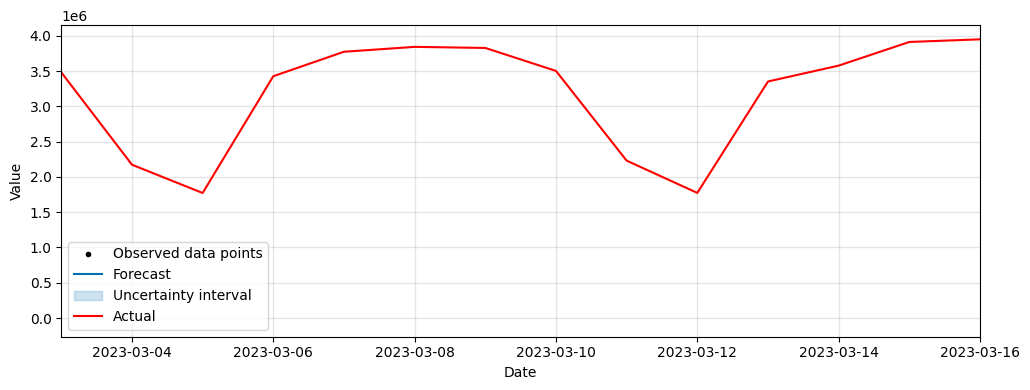

In [ ]:
# plot only the forecast
fig = m4.plot(forecast, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 4
ape = np.abs((forecast4['actual'] - forecast4['trend']) / forecast4['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 223.527%


#fold 5

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold5

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m5 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m5.fit(df)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/mientr75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/e8cyqq65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30951', 'data', 'file=/tmp/tmpu7xzseww/mientr75.json', 'init=/tmp/tmpu7xzseww/e8cyqq65.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_modelml4pvz4a/prophet_model-20230419173320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7x

In [ ]:
forecast5 = m5.predict(validation_data)
forecast5['actual'] = validation_data['y']

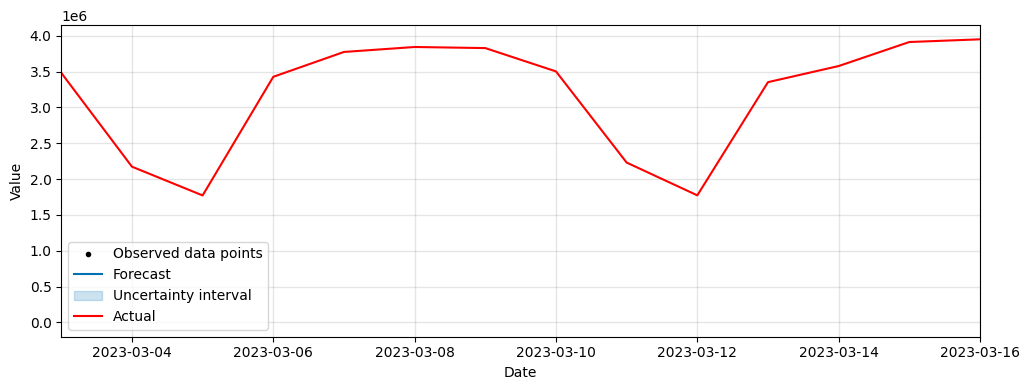

In [ ]:
# plot only the forecast
fig = m5.plot(forecast, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 4
ape = np.abs((forecast5['actual'] - forecast5['trend']) / forecast5['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 49.756%


#fold 6

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold6

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m6 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m6.fit(df)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/3aa3lkeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/n4fu0_47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15237', 'data', 'file=/tmp/tmpu7xzseww/3aa3lkeq.json', 'init=/tmp/tmpu7xzseww/n4fu0_47.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_model5ye23p6u/prophet_model-20230419173324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7x

In [ ]:
forecast6 = m6.predict(validation_data)
forecast6['actual'] = validation_data['y']

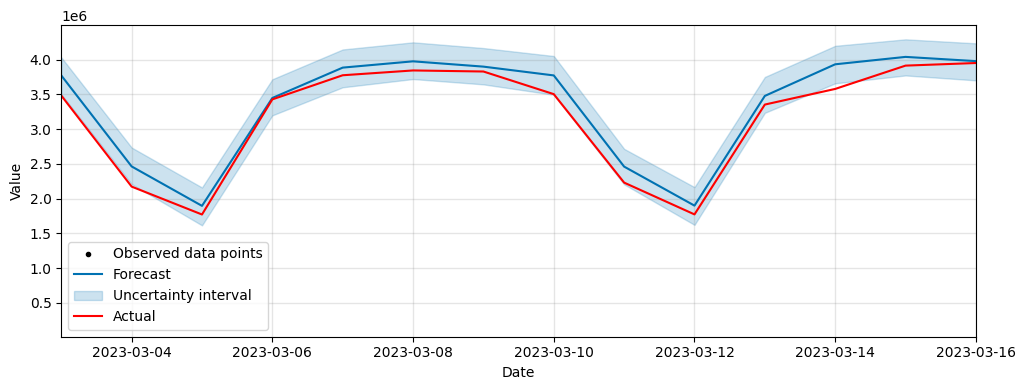

In [ ]:
# plot only the forecast
fig = m6.plot(forecast6, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 6
ape = np.abs((forecast6['actual'] - forecast6['trend']) / forecast6['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 16.452%


#fold 7

In [ ]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Load data
df = fold7

# Perform grid search CV
best_score = np.inf
for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_mode=params['seasonality_mode'])
    model.fit(df)
    forecast = model.predict(df)
    score = mean_squared_error(forecast['yhat'], df['y'])
    if score < best_score:
        best_score = score
        best_params = params

# Fit final model with best hyperparameters
m7 = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_mode=best_params['seasonality_mode'])
m7.fit(df)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/8kilij2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/bm5d2we3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63530', 'data', 'file=/tmp/tmpu7xzseww/8kilij2p.json', 'init=/tmp/tmpu7xzseww/bm5d2we3.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_modelky0ysrkl/prophet_model-20230419173330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [ ]:
forecast7 = m7.predict(validation_data)
forecast7['actual'] = validation_data['y']

In [ ]:
validation_data

,index,ds,y,day temp,night temp,barclays-center_event_occurred,beacon-theatre_event_occurred,blue-note-jazz-club_event_occurred,brooklyn-bowl_event_occurred,carnegie-hall_event_occurred,...,the-bowery-ballroom_event_occurred,the-town-hall_event_occurred,yankee-stadium_event_occurred,nyc_holiday,weather_Clear sky,weather_Cloudy,weather_Rain and snow,weather_Rainy,weather_Snowy,weather_Thunderstorm
0,1157,2023-03-03,3481830.0,45.0,41.0,0,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1158,2023-03-04,2173217.0,43.0,41.0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1159,2023-03-05,1772121.0,52.0,39.0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1160,2023-03-06,3427019.0,50.0,43.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1161,2023-03-07,3773780.0,39.0,41.0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5,1162,2023-03-08,3842861.0,41.0,32.0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
6,1163,2023-03-09,3827656.0,45.0,36.0,1,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
7,1164,2023-03-10,3502339.0,43.0,36.0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,0,0
8,1165,2023-03-11,2230530.0,41.0,36.0,1,1,1,1,0,...,1,1,0,0,0,0,0,1,0,0
9,1166,2023-03-12,1773585.0,43.0,36.0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0


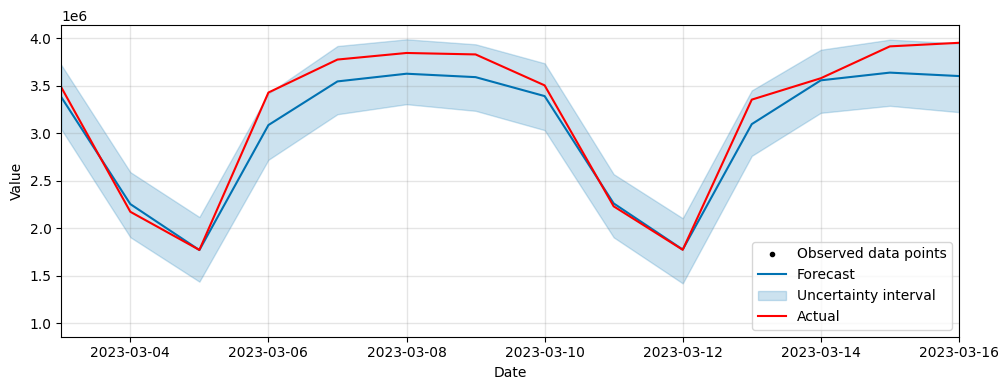

In [ ]:
# plot only the forecast
fig = m7.plot(forecast7, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 7
ape = np.abs((forecast7['actual'] - forecast7['trend']) / forecast7['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 24.540%


In [ ]:
#fold 7
#multivariate modeling
m7 = Prophet()

# Add the regressors to the model
# assume that you have already defined the Prophet model m and have loaded the data into the DataFrame df
for column in fold4.columns:
    if column != 'ds' and column != 'y':
        m7.add_regressor(column)

# Fit the model
m7.fit(fold7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/ywjryk8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu7xzseww/eebwkn2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37952', 'data', 'file=/tmp/tmpu7xzseww/ywjryk8m.json', 'init=/tmp/tmpu7xzseww/eebwkn2q.json', 'output', 'file=/tmp/tmpu7xzseww/prophet_modeliaz3doul/prophet_model-20230419175115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast7 = m7.predict(validation_data)
forecast7['actual'] = validation_data['y']

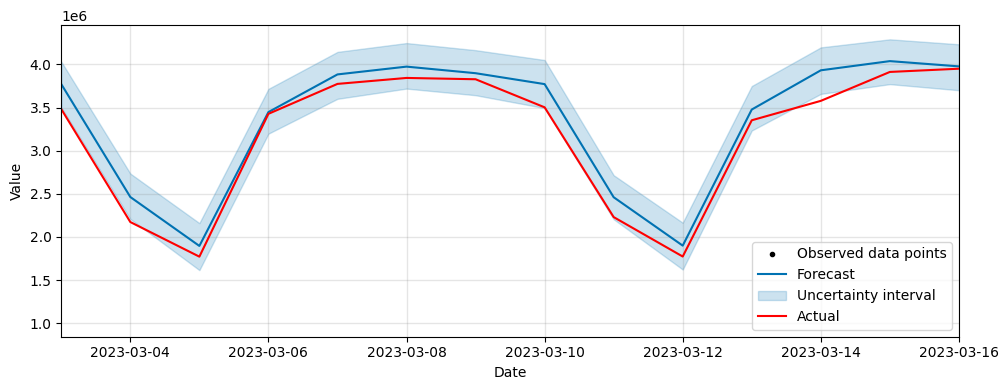

In [ ]:
# plot only the forecast
fig = m7.plot(forecast6, xlabel='Date', ylabel='Value',figsize=(10,4))
fig.gca().set_xlim([validation_data['ds'].min(), validation_data['ds'].max()])
dates = validation_data['ds']
plt.plot(dates,validation_data['y'],label = 'Actual',color = 'red')

# display the plot
plt.legend()
plt.show()

In [ ]:
#fold 7
ape = np.abs((forecast7['actual'] - forecast7['trend']) / forecast7['trend'])
mape = np.mean(ape) * 100

print('MAPE: %.3f%%' % mape)

MAPE: 24.294%
